In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [5]:
df['species'].value_counts()

virginica     50
versicolor    50
setosa        50
Name: species, dtype: int64

In [6]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

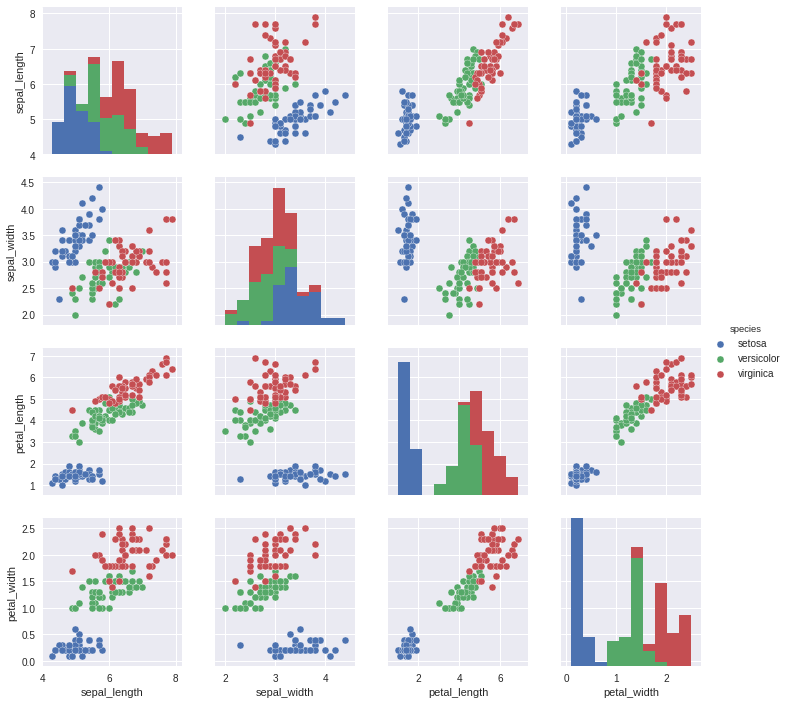

In [7]:
sns.pairplot(df, hue="species")
plt.show()

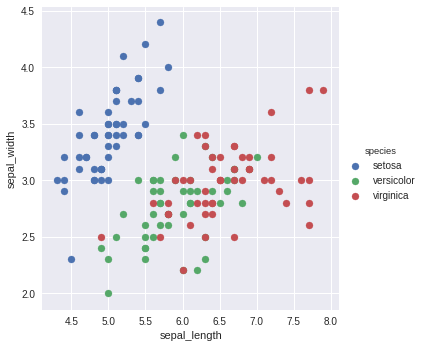

In [8]:
sns.FacetGrid(df, hue = 'species', size=5) \
    .map(plt.scatter, 'sepal_length','sepal_width') \
    .add_legend()
plt.show()

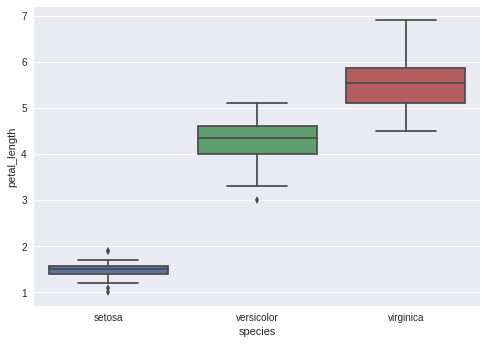

In [9]:
sns.boxplot(x='species', y='petal_length', data=df)
plt.show()

In [10]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
train, test = train_test_split(df,test_size=0.2)
print(train.shape)
print(test.shape)

(120, 5)
(30, 5)


In [13]:
X_train=train[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_train = train['species']
X_test=test[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y_test = test['species']

In [14]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
82,5.8,2.7,3.9,1.2
61,5.9,3.0,4.2,1.5
25,5.0,3.0,1.6,0.2
39,5.1,3.4,1.5,0.2
29,4.7,3.2,1.6,0.2


In [15]:
y_train.head()

82    versicolor
61    versicolor
25        setosa
39        setosa
29        setosa
Name: species, dtype: object

In [16]:
y_train.value_counts()

versicolor    43
setosa        40
virginica     37
Name: species, dtype: int64

In [17]:
knc=KNeighborsClassifier()
knc.fit(X_train, y_train).score(X_train, y_train)

0.9916666666666667

In [18]:
y_pred = knc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_pred, y_test))

0.933333333333


In [21]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train, y_train).score(X_train, y_train)

1.0

In [23]:
y_pred1 = dtc.predict(X_test)

In [24]:
print(accuracy_score(y_pred1, y_test))

0.9


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        10
 versicolor       0.75      0.86      0.80         7
  virginica       0.92      0.85      0.88        13

avg / total       0.91      0.90      0.90        30

